In [1]:
import pandas as pd
import glob
import os

In [25]:
path = r"C:\Users\SREEMOYEE\Downloads\Cyclistic-Case-study"  
all_files = glob.glob(os.path.join(path, "*.csv"))

In [26]:
print(f"Found {len(all_files)} CSV files.")


Found 12 CSV files.


In [27]:
#combining all files
df_list = []
for file in all_files:
    print(f"Reading {file} ...")
    df = pd.read_csv(file)
    df['source_file'] = os.path.basename(file)  # Add filename column
    df_list.append(df)

Reading C:\Users\SREEMOYEE\Downloads\Cyclistic-Case-study\202307-divvy-tripdata.csv ...
Reading C:\Users\SREEMOYEE\Downloads\Cyclistic-Case-study\202308-divvy-tripdata.csv ...
Reading C:\Users\SREEMOYEE\Downloads\Cyclistic-Case-study\202309-divvy-tripdata.csv ...
Reading C:\Users\SREEMOYEE\Downloads\Cyclistic-Case-study\202310-divvy-tripdata.csv ...
Reading C:\Users\SREEMOYEE\Downloads\Cyclistic-Case-study\202311-divvy-tripdata.csv ...
Reading C:\Users\SREEMOYEE\Downloads\Cyclistic-Case-study\202312-divvy-tripdata.csv ...
Reading C:\Users\SREEMOYEE\Downloads\Cyclistic-Case-study\202401-divvy-tripdata.csv ...
Reading C:\Users\SREEMOYEE\Downloads\Cyclistic-Case-study\202402-divvy-tripdata.csv ...
Reading C:\Users\SREEMOYEE\Downloads\Cyclistic-Case-study\202403-divvy-tripdata.csv ...
Reading C:\Users\SREEMOYEE\Downloads\Cyclistic-Case-study\202404-divvy-tripdata.csv ...
Reading C:\Users\SREEMOYEE\Downloads\Cyclistic-Case-study\202405-divvy-tripdata.csv ...
Reading C:\Users\SREEMOYEE\Downl

In [28]:
combined_df = pd.concat(df_list, ignore_index=True)
print(f"Combined DataFrame shape: {combined_df.shape}")

Combined DataFrame shape: (5734381, 14)


In [29]:
output_path = r"C:\Users\SREEMOYEE\Downloads\Cyclistic-Case-Study\Combined Data\cyclistic_tripdata_12months.csv"  

In [30]:
os.makedirs(os.path.dirname(output_path), exist_ok=True)

In [3]:
df = pd.read_csv("cyclistic_tripdata_12months.csv")

In [31]:
combined_df.to_csv(output_path, index=False)

In [32]:
print(f"Combined dataset saved at:\n{output_path}")

Combined dataset saved at:
C:\Users\SREEMOYEE\Downloads\Cyclistic-Case-Study\Combined Data\cyclistic_tripdata_12months.csv


In [33]:
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,source_file
0,CDE6023BE6B11D2F,electric_bike,2024-06-11 17:20:06.289,2024-06-11 17:21:39.464,NaN,NaN,NaN,NaN,41.89,-87.65,41.89,-87.65,casual,202406-divvy-tripdata.csv
1,462B48CD292B6A18,electric_bike,2024-06-11 17:19:21.567,2024-06-11 17:19:36.377,NaN,NaN,NaN,NaN,41.89,-87.65,41.89,-87.65,casual,202406-divvy-tripdata.csv
2,9CFB6A858D23ABF7,electric_bike,2024-06-11 17:25:27.089,2024-06-11 17:30:13.035,NaN,NaN,NaN,NaN,41.93,-87.65,41.94,-87.65,casual,202406-divvy-tripdata.csv
3,6365EFEB64231153,electric_bike,2024-06-11 11:53:50.769,2024-06-11 12:08:13.382,NaN,NaN,NaN,NaN,41.88,-87.64,41.88,-87.64,casual,202406-divvy-tripdata.csv
4,BA0323C33134CBA8,electric_bike,2024-06-11 00:11:08.237,2024-06-11 00:11:22.998,NaN,NaN,NaN,NaN,41.94,-87.64,41.94,-87.64,casual,202406-divvy-tripdata.csv


In [34]:
# Remove rows with null values
df.dropna(inplace=True)

In [35]:
# Convert started_at and ended_at with mixed formats
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')


In [36]:
df = df.dropna(subset=['started_at', 'ended_at'])


In [37]:
# Create 'ride_length' in minutes
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


In [38]:
# Remove rows with negative ride_length
df = df[df['ride_length'] >= 0]


In [39]:
# Add 'day_of_week' column
df['day_of_week'] = df['started_at'].dt.day_name()

In [40]:
print(" Data cleaned and new columns added!")
df.head()

 Data cleaned and new columns added!


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,source_file,ride_length,day_of_week
841,7FED56E160AFB564,classic_bike,2024-06-17 15:10:56.895,2024-06-17 15:12:30.744,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,202406-divvy-tripdata.csv,1.564150,Monday
842,84260B28A7C9BBA1,classic_bike,2024-06-17 15:10:35.545,2024-06-17 15:12:12.398,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,202406-divvy-tripdata.csv,1.614217,Monday
1306,95367640BB007C8D,classic_bike,2024-06-08 16:11:10.249,2024-06-08 16:21:25.419,California Ave & Division St,13256,California Ave & Milwaukee Ave,13084,41.903029,-87.697474,41.922695,-87.697153,casual,202406-divvy-tripdata.csv,10.252833,Saturday
1327,4DF083CCDC1B950F,electric_bike,2024-06-07 21:33:36.986,2024-06-07 21:45:23.864,California Ave & Division St,13256,Wood St & Chicago Ave,637,41.903013,-87.697619,41.895634,-87.672069,casual,202406-divvy-tripdata.csv,11.781300,Friday
1374,BFAD51AB1A4887B2,classic_bike,2024-06-24 17:51:13.687,2024-06-24 17:56:09.707,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,202406-divvy-tripdata.csv,4.933667,Monday


In [41]:
df.to_csv("C:/Users/SREEMOYEE/Documents/cyclistic_tripdata_cleaned.csv", index=False)


In [42]:
# Summary stats: total rides, avg, median, max, min ride_length
summary = df.groupby('member_casual')['ride_length'].agg(['count', 'mean', 'median', 'max', 'min']).reset_index()
summary.columns = ['User Type', 'Total Rides', 'Avg Ride Length (min)', 'Median Ride Length (min)', 'Max Ride Length (min)', 'Min Ride Length (min)']
summary


,User Type,Total Rides,Avg Ride Length (min),Median Ride Length (min),Max Ride Length (min),Min Ride Length (min)
0,casual,208367,26.399290,15.136383,1496.330933,0.002583
1,member,285959,13.683851,9.903900,1488.204667,0.004383


In [43]:
# Total rides per weekday by user type
rides_per_day = df.groupby(['member_casual', 'day_of_week']).size().reset_index(name='num_rides')
# Sort weekdays
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
rides_per_day['day_of_week'] = pd.Categorical(rides_per_day['day_of_week'], categories=days_order, ordered=True)
rides_per_day = rides_per_day.sort_values('day_of_week')

rides_per_day

,member_casual,day_of_week,num_rides
3,casual,Sunday,46209
10,member,Sunday,41800
1,casual,Monday,21290
8,member,Monday,39202
5,casual,Tuesday,20627
12,member,Tuesday,41147
6,casual,Wednesday,26660
13,member,Wednesday,44298
4,casual,Thursday,24207
11,member,Thursday,43205


In [44]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns

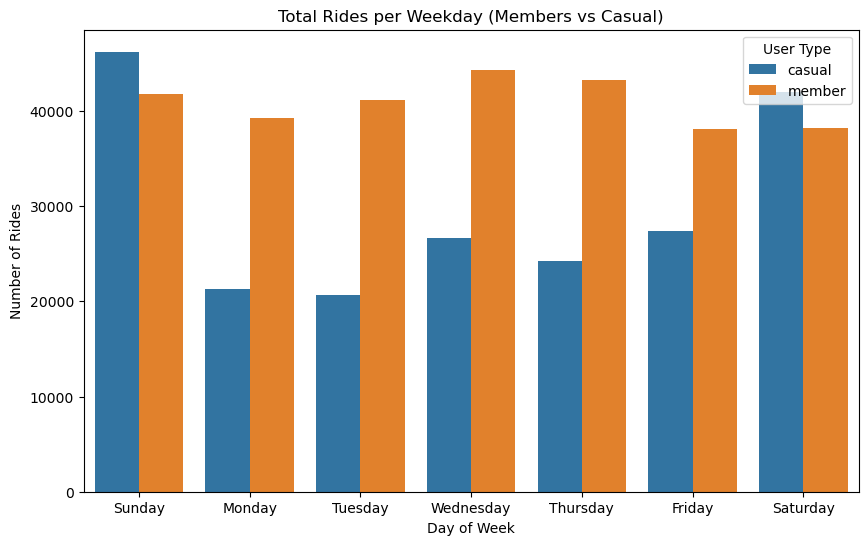

In [45]:
# Bar chart: Total rides per weekday
plt.figure(figsize=(10,6))
sns.barplot(data=rides_per_day, x='day_of_week', y='num_rides', hue='member_casual')
plt.title('Total Rides per Weekday (Members vs Casual)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')
plt.show()

In [46]:
# Avg ride length per weekday
avg_ride_length_day = df.groupby(['member_casual', 'day_of_week'])['ride_length'].mean().reset_index()
avg_ride_length_day['day_of_week'] = pd.Categorical(avg_ride_length_day['day_of_week'], categories=days_order, ordered=True)
avg_ride_length_day = avg_ride_length_day.sort_values('day_of_week')


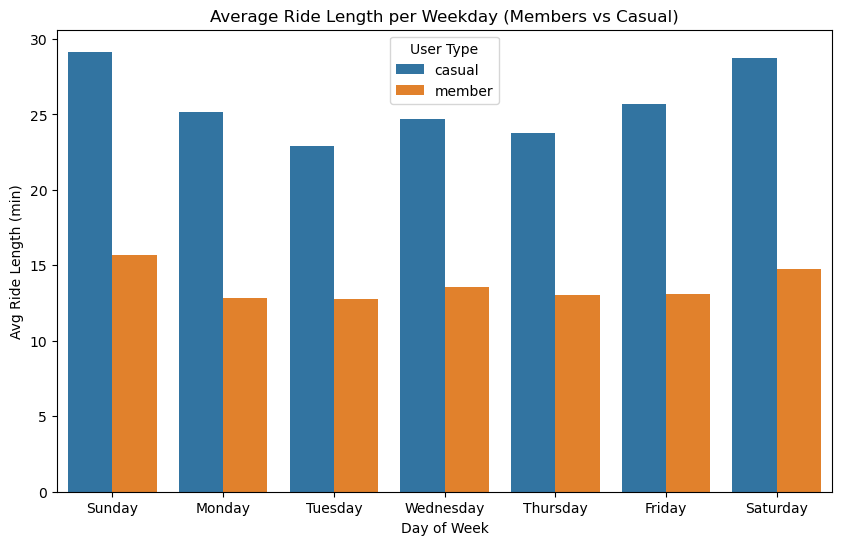

In [47]:
# Bar chart: Avg ride length per weekday
plt.figure(figsize=(10,6))
sns.barplot(data=avg_ride_length_day, x='day_of_week', y='ride_length', hue='member_casual')
plt.title('Average Ride Length per Weekday (Members vs Casual)')
plt.xlabel('Day of Week')
plt.ylabel('Avg Ride Length (min)')
plt.legend(title='User Type')
plt.show()

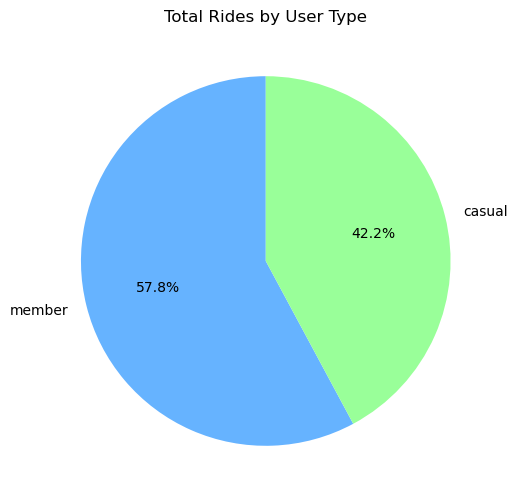

In [48]:
# Pie chart
#total rides by user type
user_counts = df['member_casual'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Total Rides by User Type')
plt.show()